### Setup and Common Code

In [1]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Import Datasets
from sklearn.datasets import make_blobs, make_moons, load_iris

# Function to visualize clustering results in 2D
def visualize_clusters(X, labels, title):
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### Dataset Preparation

In [2]:
# Option A: make_blobs (Ideal for centroid-based algorithms like K-Means)
X_blobs, y_true_blobs = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)
dataset_name = "Blobs"

# Option B: make_moons (Ideal for density-based algorithms like DBSCAN)
X_moons, y_true_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
dataset_name = "Moons"

# Option C: load_iris (Ignore the labels for clustering, use only 2 features for visualization)
iris = load_iris()
X_iris = iris.data[:, :2]  # Use only the first two features (sepal length & width)
y_true_iris = iris.target  # True labels for comparison (not used in clustering)
dataset_name = "Iris (First 2 Features)"

# Clustering Models

### 1. K-Means

K-Means Clustering:


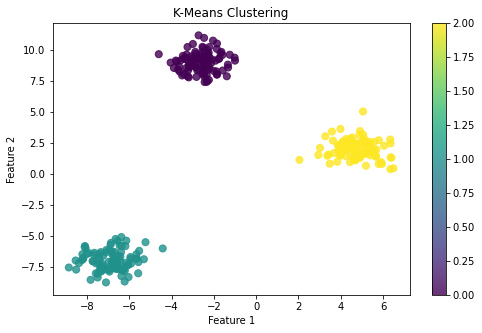

In [4]:
from sklearn.cluster import KMeans

# Choose a dataset (X) from the options above
X = X_blobs

# Create and fit the model
print("K-Means Clustering:")
model = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = model.fit_predict(X)

# Visualize the results
visualize_clusters(X, labels, 'K-Means Clustering')

### 2. DBSCAN

DBSCAN Clustering:


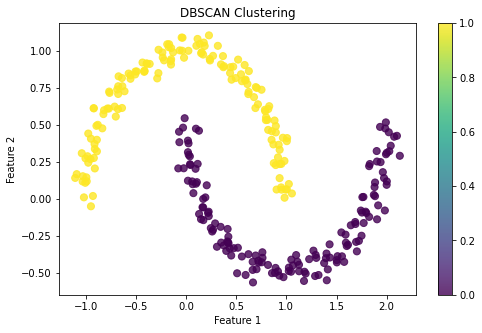

In [5]:
from sklearn.cluster import DBSCAN

# Choose a dataset (X) from the options above
X = X_moons

# Create and fit the model
print("DBSCAN Clustering:")
# eps: maximum distance between two samples to be considered in the same neighborhood.
# min_samples: number of samples in a neighborhood to form a core point.
model = DBSCAN(eps=0.3, min_samples=5)
labels = model.fit_predict(X)

# Visualize the results
visualize_clusters(X, labels, 'DBSCAN Clustering')
# Note: Points labeled -1 are considered noise/outliers.

### 3. Agglomerative Clustering

Agglomerative Clustering:


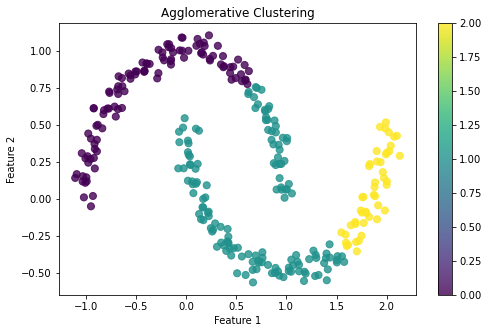

In [22]:
from sklearn.cluster import AgglomerativeClustering

# Choose a dataset (X) from the options above
X = X_iris

# Create and fit the model
print("Agglomerative Clustering:")
# n_clusters: The number of clusters to find.
# linkage: determines which distance to use between sets of observation.
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X)

# Visualize the results
visualize_clusters(X, labels, 'Agglomerative Clustering')

### 4. Spectral Clustering

Spectral Clustering:


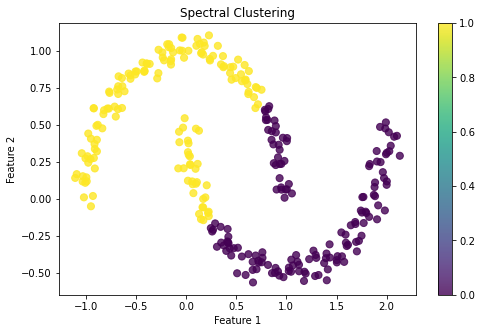

In [28]:
from sklearn.cluster import SpectralClustering

# Choose a dataset (X) from the options above
X = X_moons # Good for non-convex shapes

# Create and fit the model
print("Spectral Clustering:")
model = SpectralClustering(n_clusters=2, affinity='rbf', random_state=42)
labels = model.fit_predict(X)

# Visualize the results
visualize_clusters(X, labels, 'Spectral Clustering')

### 5. Gaussian Mixture Models (GMM)

Gaussian Mixture Model (GMM):


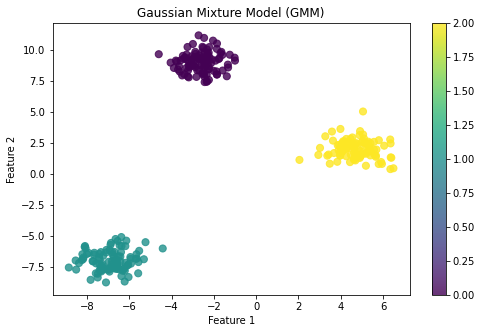

In [9]:
from sklearn.mixture import GaussianMixture

# Choose a dataset (X) from the options above
X = X_blobs # Data is generated from Gaussians, so GMM works well

# Create and fit the model
print("Gaussian Mixture Model (GMM):")
model = GaussianMixture(n_components=3, random_state=42)
labels = model.fit_predict(X) # Uses the predict method to get cluster assignments

# Visualize the results
visualize_clusters(X, labels, 'Gaussian Mixture Model (GMM)')

## Complete Example: Comparing Algorithms on a Dataset

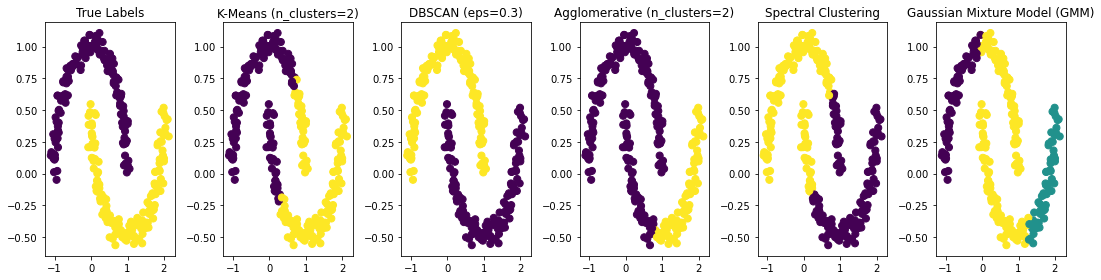

In [20]:
# --- COMPLETE EXAMPLE: Comparing Clusters on Moons Dataset ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Generate the data
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# Create a list of models to compare
models = {
    'K-Means (n_clusters=2)': KMeans(n_clusters=2, random_state=42, n_init=10),
    'DBSCAN (eps=0.3)': DBSCAN(eps=0.3, min_samples=5),
    'Agglomerative (n_clusters=2)': AgglomerativeClustering(n_clusters=2, linkage='average'),
    'Spectral Clustering': SpectralClustering(n_clusters=2, affinity='rbf', random_state=42),
    'Gaussian Mixture Model (GMM)': GaussianMixture(n_components=3, random_state=42)
}

# Plot the results
plt.figure(figsize=(15, 4))
plt.subplot(1, len(models) + 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("True Labels")

# Fit each model and plot its results
for i, (name, model) in enumerate(models.items(), 2):
    labels = model.fit_predict(X)
    plt.subplot(1, len(models) + 1, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(name)

plt.tight_layout()
plt.show()

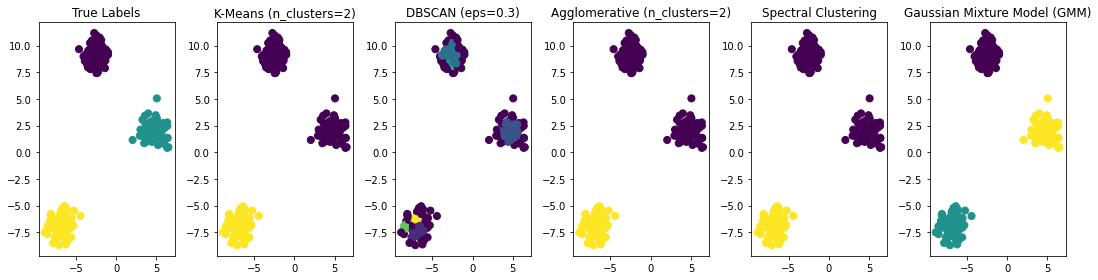

In [21]:
# --- COMPLETE EXAMPLE: Comparing Clusters on Blobs Dataset ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Generate the data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)


# Create a list of models to compare
models = {
    'K-Means (n_clusters=2)': KMeans(n_clusters=2, random_state=42, n_init=10),
    'DBSCAN (eps=0.3)': DBSCAN(eps=0.3, min_samples=5),
    'Agglomerative (n_clusters=2)': AgglomerativeClustering(n_clusters=2, linkage='average'),
    'Spectral Clustering': SpectralClustering(n_clusters=2, affinity='rbf', random_state=42),
    'Gaussian Mixture Model (GMM)': GaussianMixture(n_components=3, random_state=42)
}

# Plot the results
plt.figure(figsize=(15, 4))
plt.subplot(1, len(models) + 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("True Labels")

# Fit each model and plot its results
for i, (name, model) in enumerate(models.items(), 2):
    labels = model.fit_predict(X)
    plt.subplot(1, len(models) + 1, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(name)

plt.tight_layout()
plt.show()

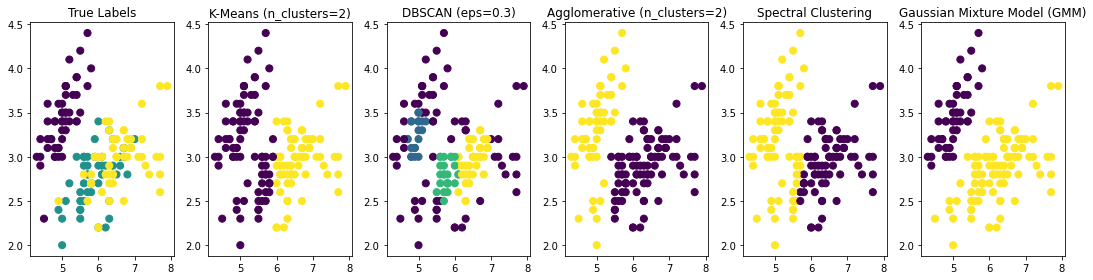

In [26]:
# --- COMPLETE EXAMPLE: Comparing Clusters on Iris Dataset ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Generate the data
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length & width)
y_true = iris.target  # True labels for comparison (not used in clustering)

# Create a list of models to compare
models = {
    'K-Means (n_clusters=2)': KMeans(n_clusters=2, random_state=42, n_init=10),
    'DBSCAN (eps=0.3)': DBSCAN(eps=0.3, min_samples=5),
    'Agglomerative (n_clusters=2)': AgglomerativeClustering(n_clusters=2, linkage='average'),
    'Spectral Clustering': SpectralClustering(n_clusters=2, affinity='rbf', random_state=42),
    'Gaussian Mixture Model (GMM)': GaussianMixture(n_components=2, random_state=42)
}

# Plot the results
plt.figure(figsize=(15, 4))
plt.subplot(1, len(models) + 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("True Labels")

# Fit each model and plot its results
for i, (name, model) in enumerate(models.items(), 2):
    labels = model.fit_predict(X)
    plt.subplot(1, len(models) + 1, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(name)

plt.tight_layout()
plt.show()